[Reference](https://medium.com/data-bistrot/log-normal-distribution-with-python-7b8e384e939e)

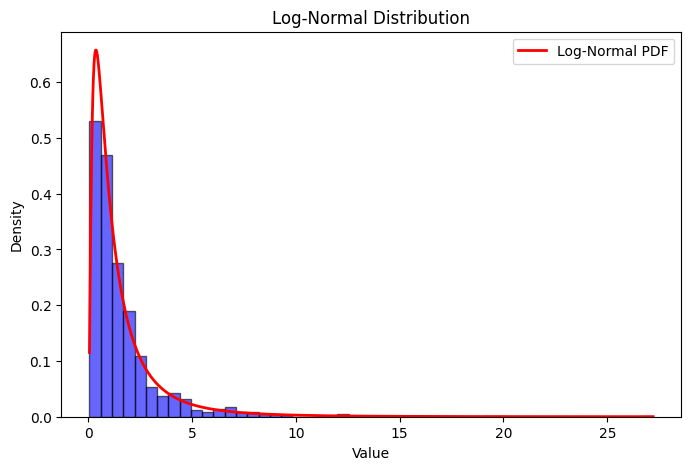

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Define parameters
mu = 0      # Mean of log(X)
sigma = 1   # Standard deviation of log(X)

# Generate log-normal data
data = np.random.lognormal(mean=mu, sigma=sigma, size=1000)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')

# Overlay log-normal PDF
x = np.linspace(min(data), max(data), 1000)
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
plt.plot(x, pdf, 'r', linewidth=2, label="Log-Normal PDF")

plt.title("Log-Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Log-Normal Distribution Mean and Variance

In [2]:
# Compute theoretical mean and variance
mean_theoretical = np.exp(mu + (sigma**2) / 2)
variance_theoretical = (np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2)

# Compute sample mean and variance
mean_sample = np.mean(data)
variance_sample = np.var(data)

print(f"Theoretical Mean: {mean_theoretical:.2f}, Sample Mean: {mean_sample:.2f}")
print(f"Theoretical Variance: {variance_theoretical:.2f}, Sample Variance: {variance_sample:.2f}")

Theoretical Mean: 1.65, Sample Mean: 1.68
Theoretical Variance: 4.67, Sample Variance: 4.63


# Log-Normal CDF and Percentiles

In [3]:
# Compute CDF for a specific value
x_value = 2
cdf_value = lognorm.cdf(x_value, s=sigma, scale=np.exp(mu))

# Compute 90th percentile
percentile_90 = lognorm.ppf(0.90, s=sigma, scale=np.exp(mu))

print(f"CDF at x={x_value}: {cdf_value:.4f}")
print(f"90th Percentile: {percentile_90:.4f}")

CDF at x=2: 0.7559
90th Percentile: 3.6022


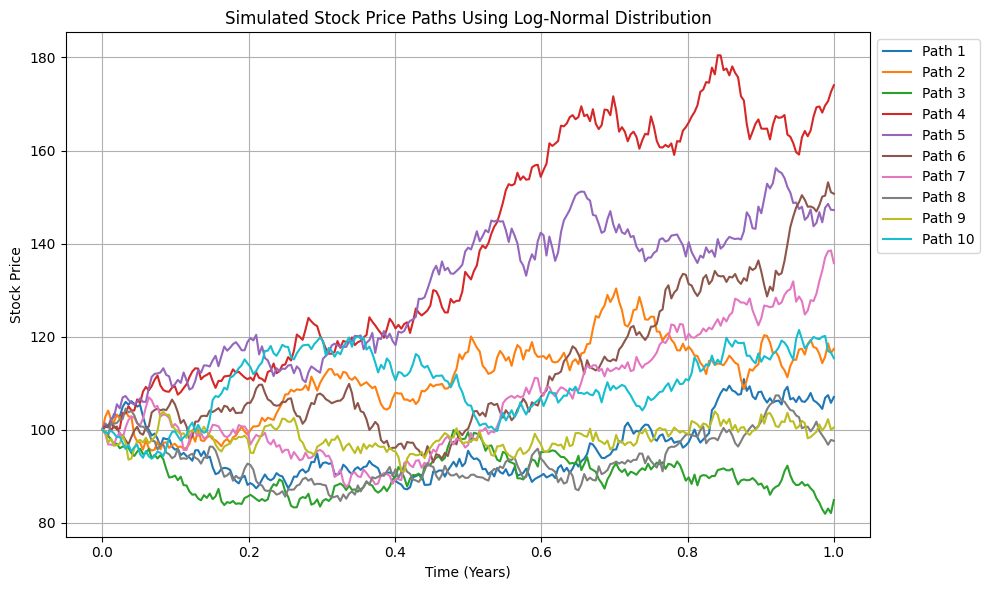

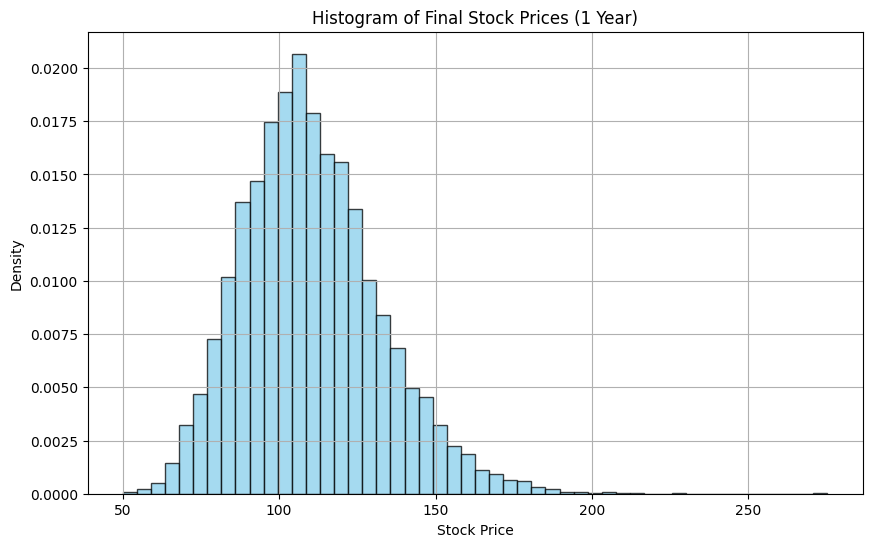

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the simulation
S0 = 100           # Initial stock price
mu = 0.1           # Expected annual return (10%)
sigma = 0.2        # Annual volatility (20%)
T = 1              # Time horizon in years
N = 252            # Number of trading days in a year
dt = T / N         # Time step

# Time array for plotting
time = np.linspace(0, T, N+1)

# Simulate a few stock price paths
num_paths = 10
paths = np.zeros((num_paths, N+1))
paths[:, 0] = S0

for i in range(num_paths):
    # Generate daily random shocks from a standard normal distribution
    rand_increments = np.random.normal(0, 1, N)
    # Compute log returns: drift + shock component
    log_returns = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand_increments
    # Cumulatively sum log returns and convert back to price level
    paths[i, 1:] = S0 * np.exp(np.cumsum(log_returns))

# Plot the simulated stock price paths
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=1.5, label=f'Path {i+1}')
plt.title('Simulated Stock Price Paths Using Log-Normal Distribution')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Simulate many paths to illustrate the distribution of final stock prices
num_paths_hist = 10000
final_prices = np.zeros(num_paths_hist)
for i in range(num_paths_hist):
    rand_increments = np.random.normal(0, 1, N)
    log_returns = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand_increments
    final_prices[i] = S0 * np.exp(np.sum(log_returns))

# Plot a histogram of the final stock prices after 1 year
plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=50, density=True, alpha=0.75, edgecolor='black', color='skyblue')
plt.title('Histogram of Final Stock Prices (1 Year)')
plt.xlabel('Stock Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()